Imports

In [1]:
import cifar
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import copy

from typing import NamedTuple

Initialize containers to be used

In [2]:
class ImageMetaData(NamedTuple):
    rgb: np.ndarray
    filename: str
    img_class: str

Some helper functions/constants

In [3]:
# Pure red/green/blue values
RED_U8 = [255, 0, 0]
GREEN_U8 = [0, 255, 0]
BLUE_U8 = [0, 0, 255]

FIGURE_PATH = "figures/hw1"

os.makedirs(FIGURE_PATH, exist_ok = True)

def figure_path(name: str):
    return os.path.join(FIGURE_PATH, name)

Set random seed

In [4]:
np.random.seed(100)

Unpack dataset

In [5]:
data = cifar.unpack("data_batch_1")
data

{'batch_label': 'training batch 1 of 5',
 'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
  0,

Visualize one image from each image class

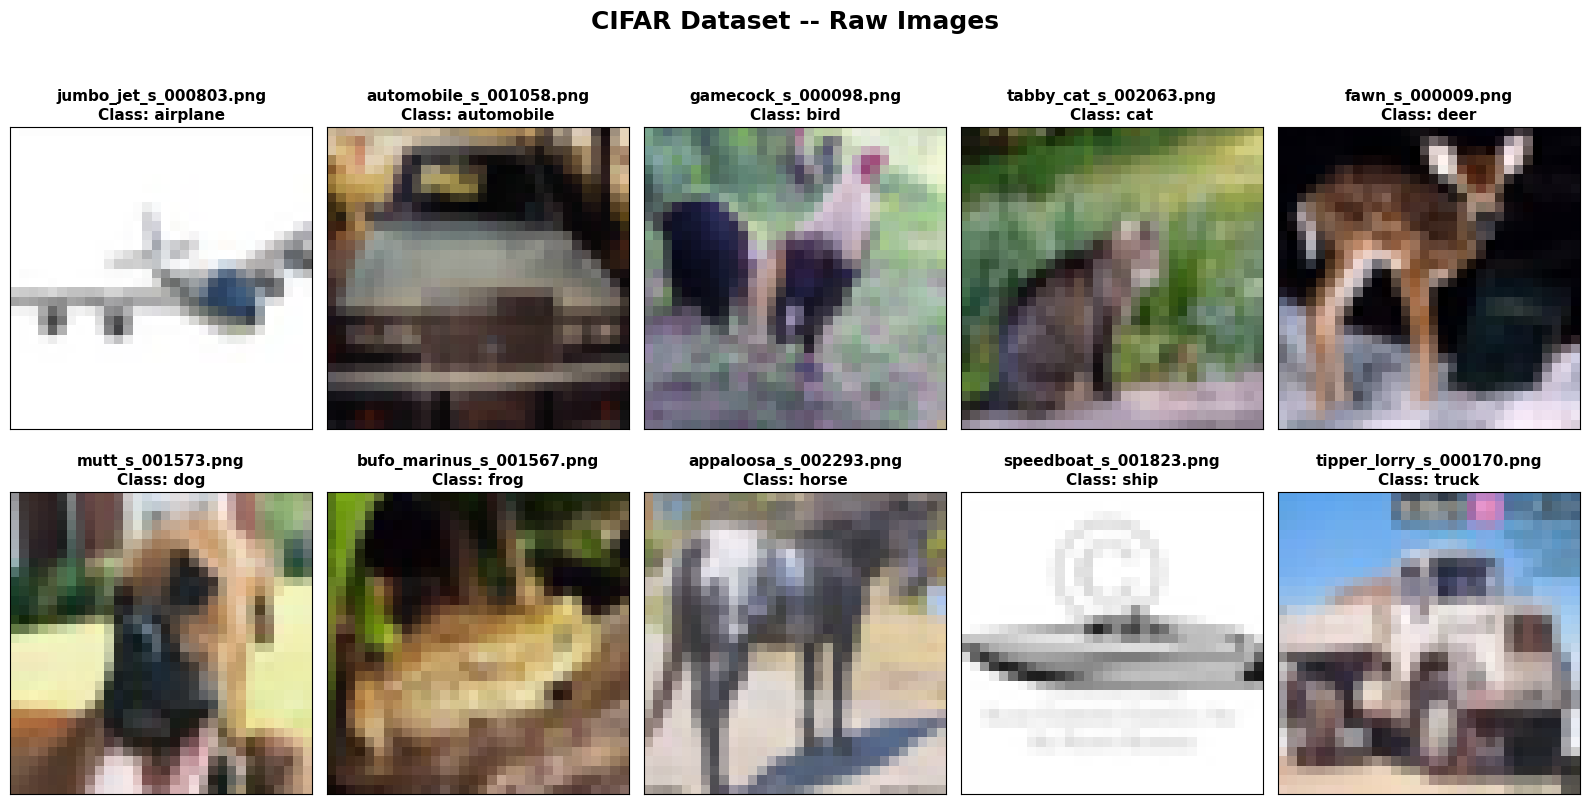

In [6]:
fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
fig.suptitle("CIFAR Dataset -- Raw Images", fontsize = 18, fontweight = 'bold')

ax = ax.flatten() # flatten array to iterate with a single loop

# initialize list of image containers
img_data: list[ImageMetaData] = []

for ii in range(10):
    # get images corresponding to a given label
    imgs, names = cifar.get_images_by_label(data, label = ii)
    
    # randomly select an index in the list of images to use as image for a given class
    rand_img_index = np.random.randint(0, len(imgs)-1)
    
    img_data.append(
        ImageMetaData(
            rgb = cifar.data_to_rgb_image(imgs[rand_img_index]),
            filename = names[rand_img_index],
            img_class = cifar.label_index_to_name(ii)
        )
    )
    
    # visualize image
    ax[ii].imshow(img_data[ii].rgb)
    ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
    
    # remove x/y-ticks from image
    ax[ii].set_xticks([])
    ax[ii].set_yticks([])
    ax[ii].set_xticklabels([])
    ax[ii].set_yticklabels([])
    
fig.savefig(figure_path("raw_images.png"))

Apply Gaussian smoothing at varying sigma levels

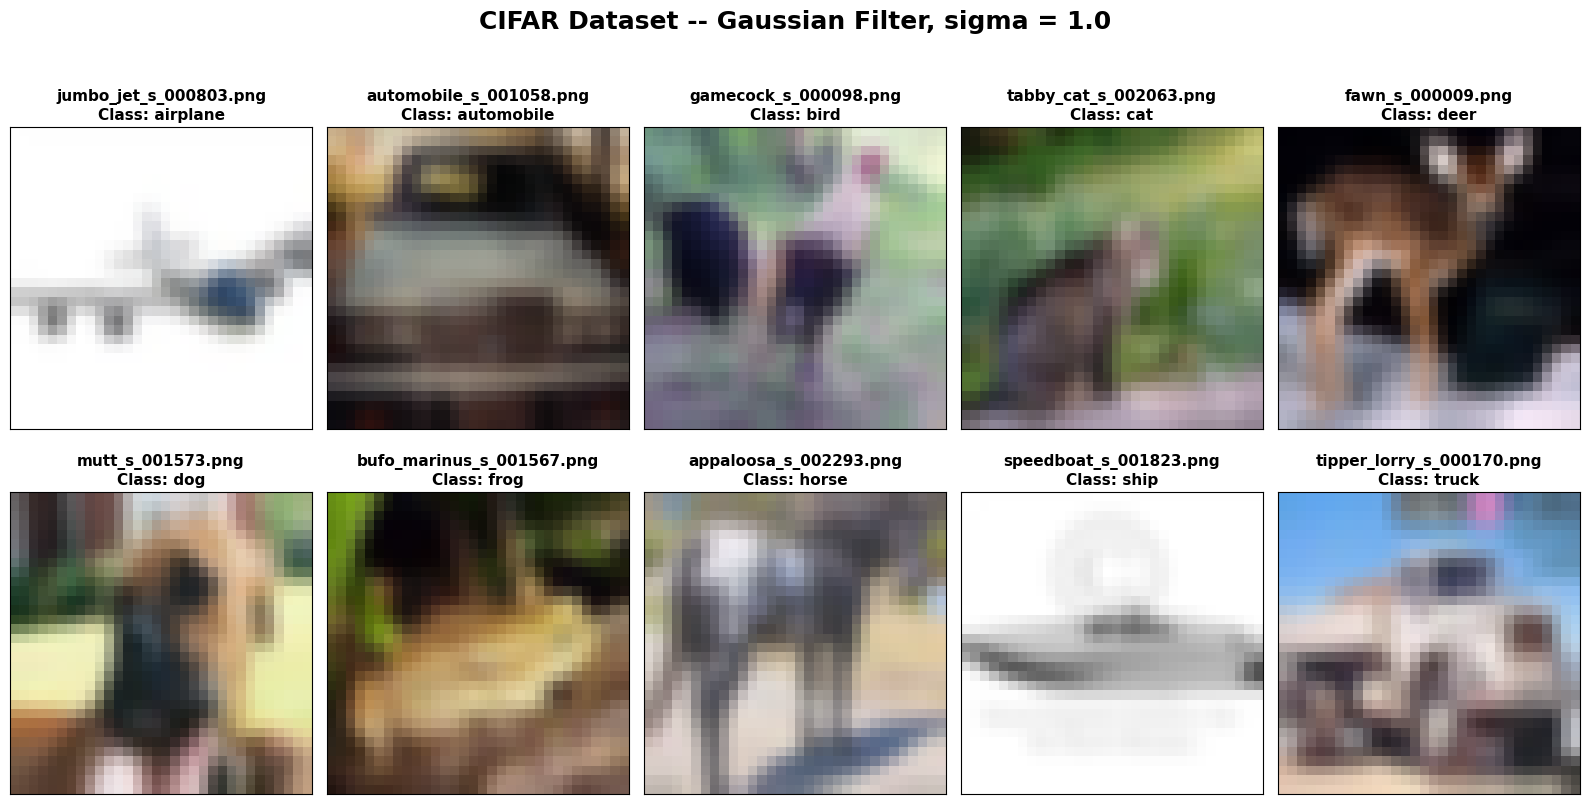

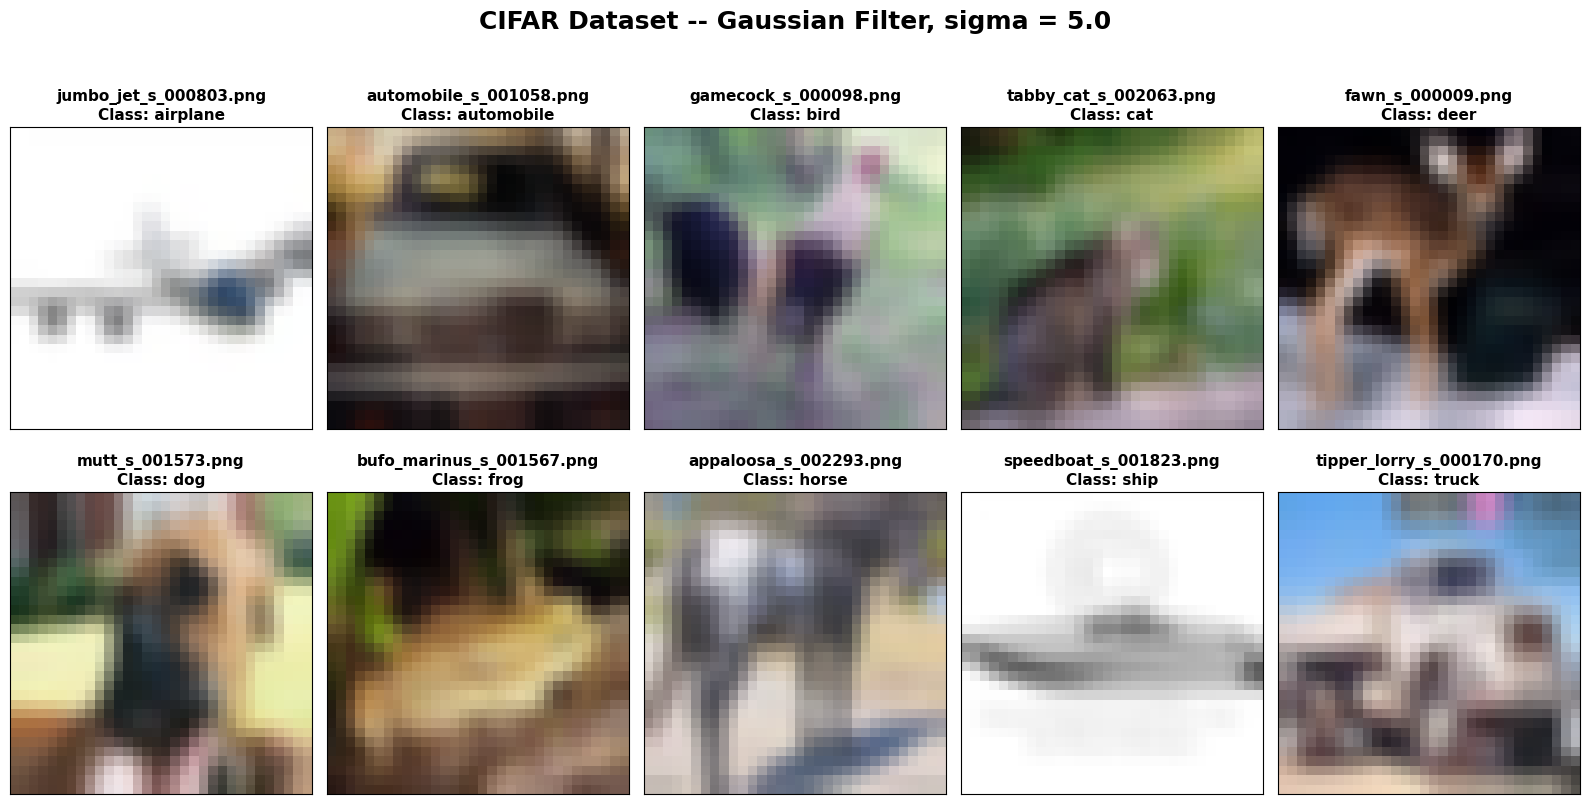

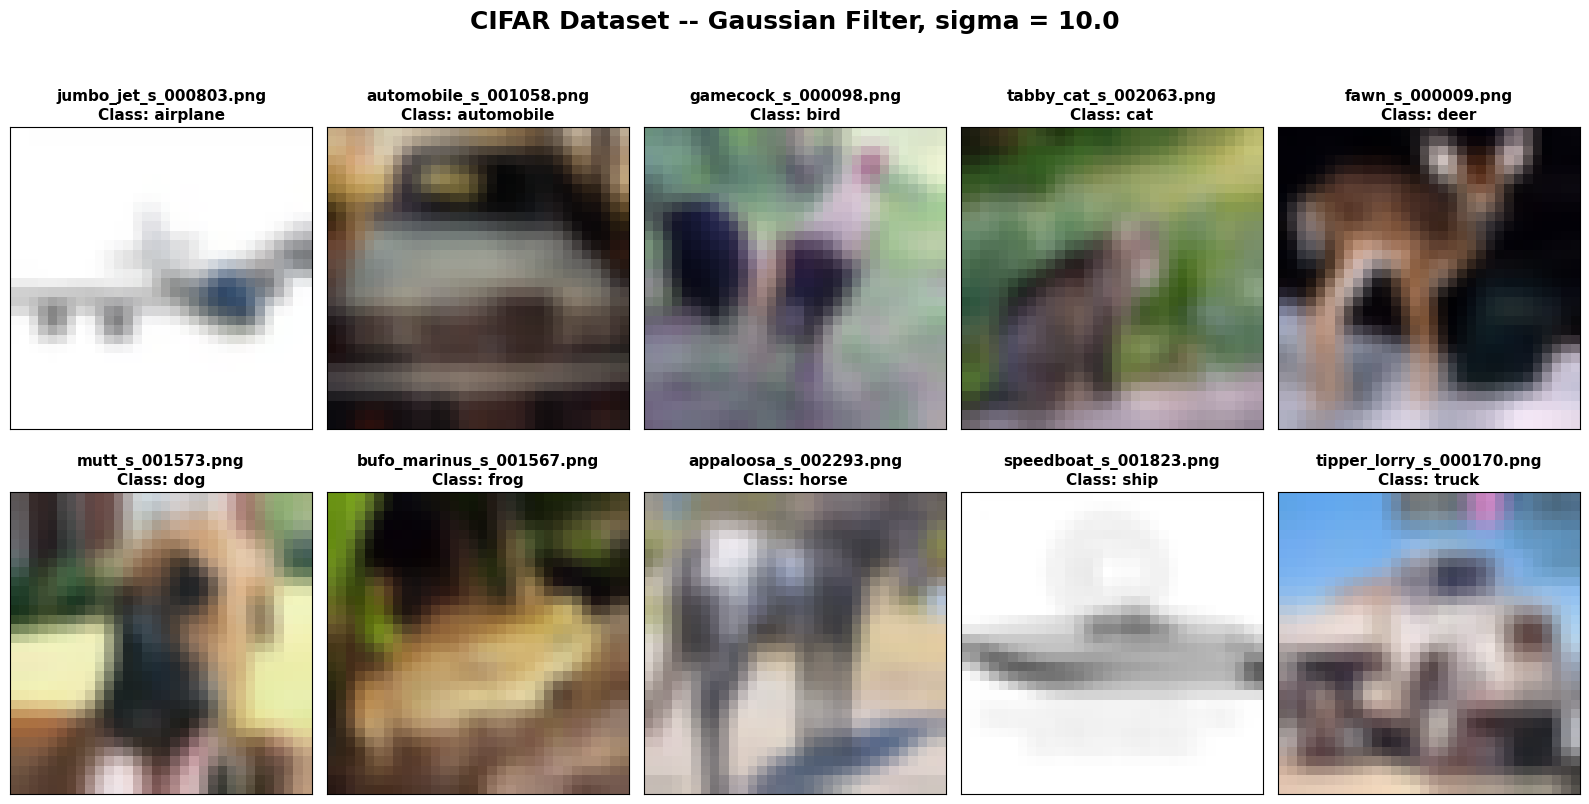

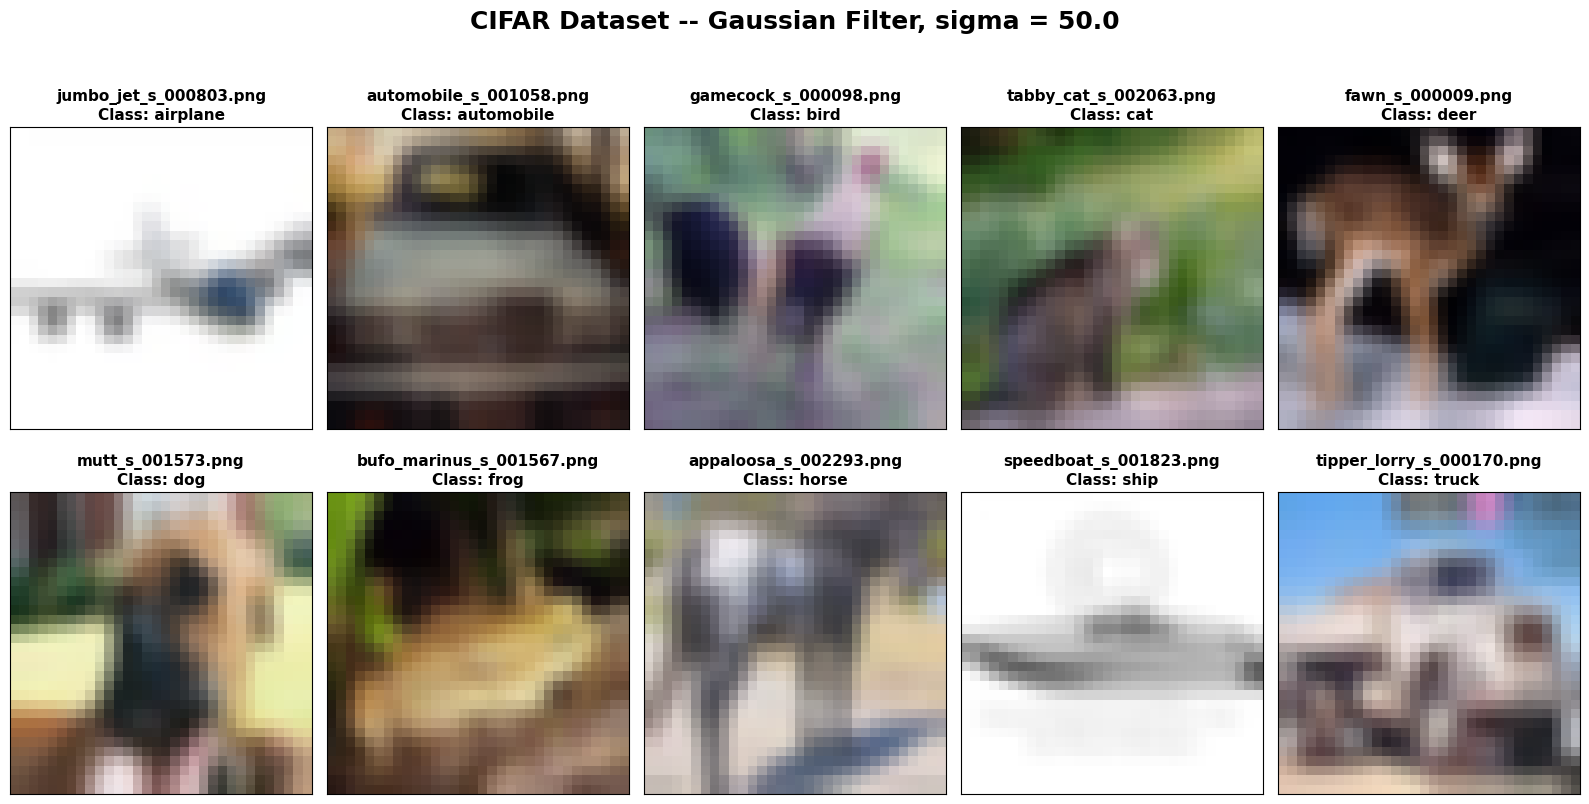

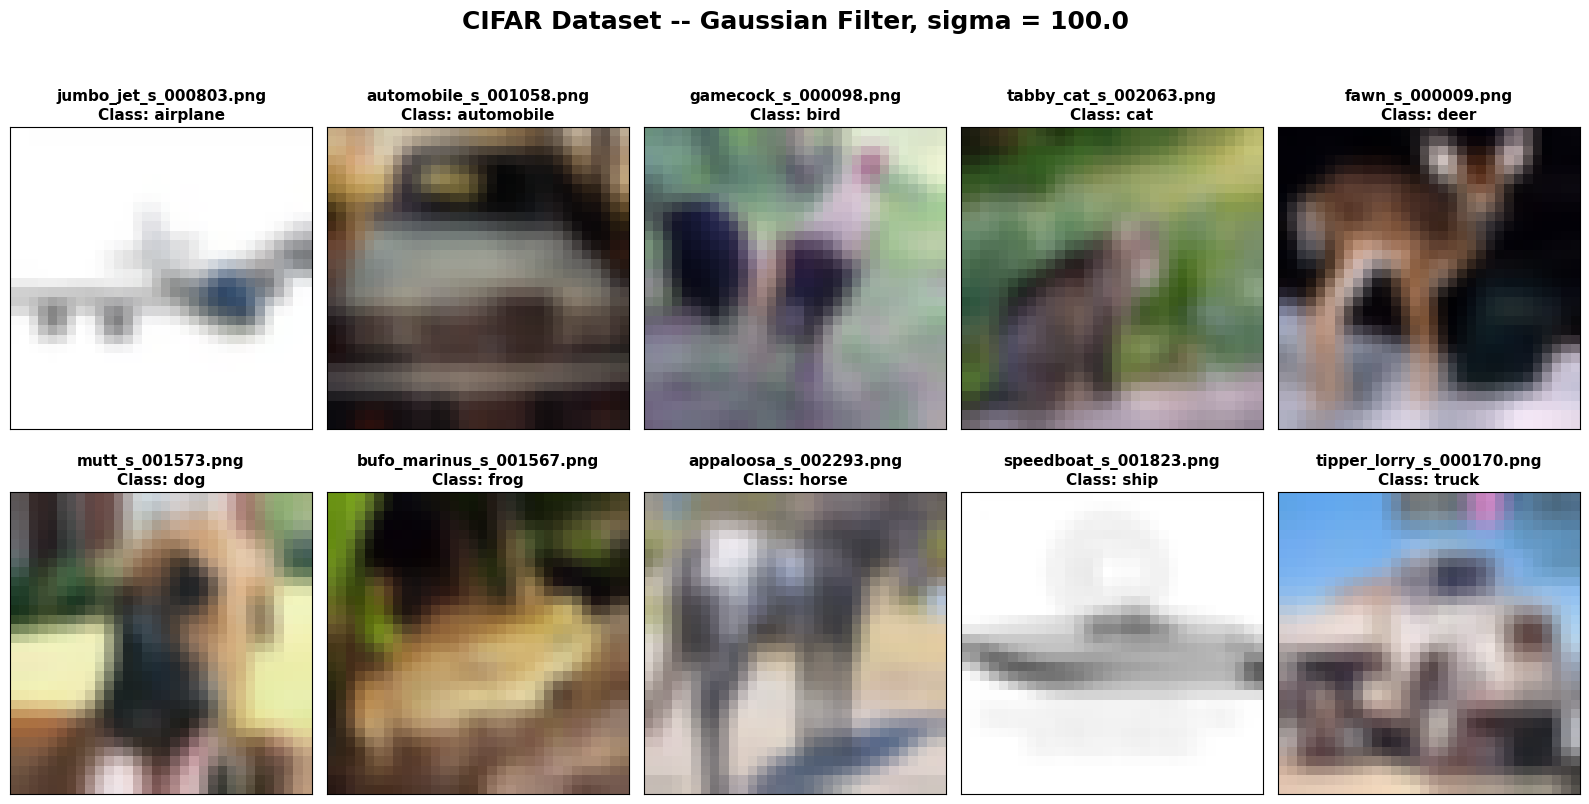

In [7]:
for s in [1.0, 5.0, 10.0, 50.0, 100.0]:
    fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
    fig.suptitle(f"CIFAR Dataset -- Gaussian Filter, sigma = {s}", fontsize = 18, fontweight = 'bold')
    ax = ax.flatten() # flatten array to iterate with a single loop
    
    for ii in range(10):    
        # visualize image
        ax[ii].imshow(cv.GaussianBlur(src = img_data[ii].rgb, ksize = (3,3), sigmaX = s, sigmaY = s))
        ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
        
        # remove x/y-ticks from image
        ax[ii].set_xticks([])
        ax[ii].set_yticks([])
        ax[ii].set_xticklabels([])
        ax[ii].set_yticklabels([])
        
    fig.savefig(figure_path(f"gauss_filter_sigma_{s}.png"))

Apply average filtering to the images

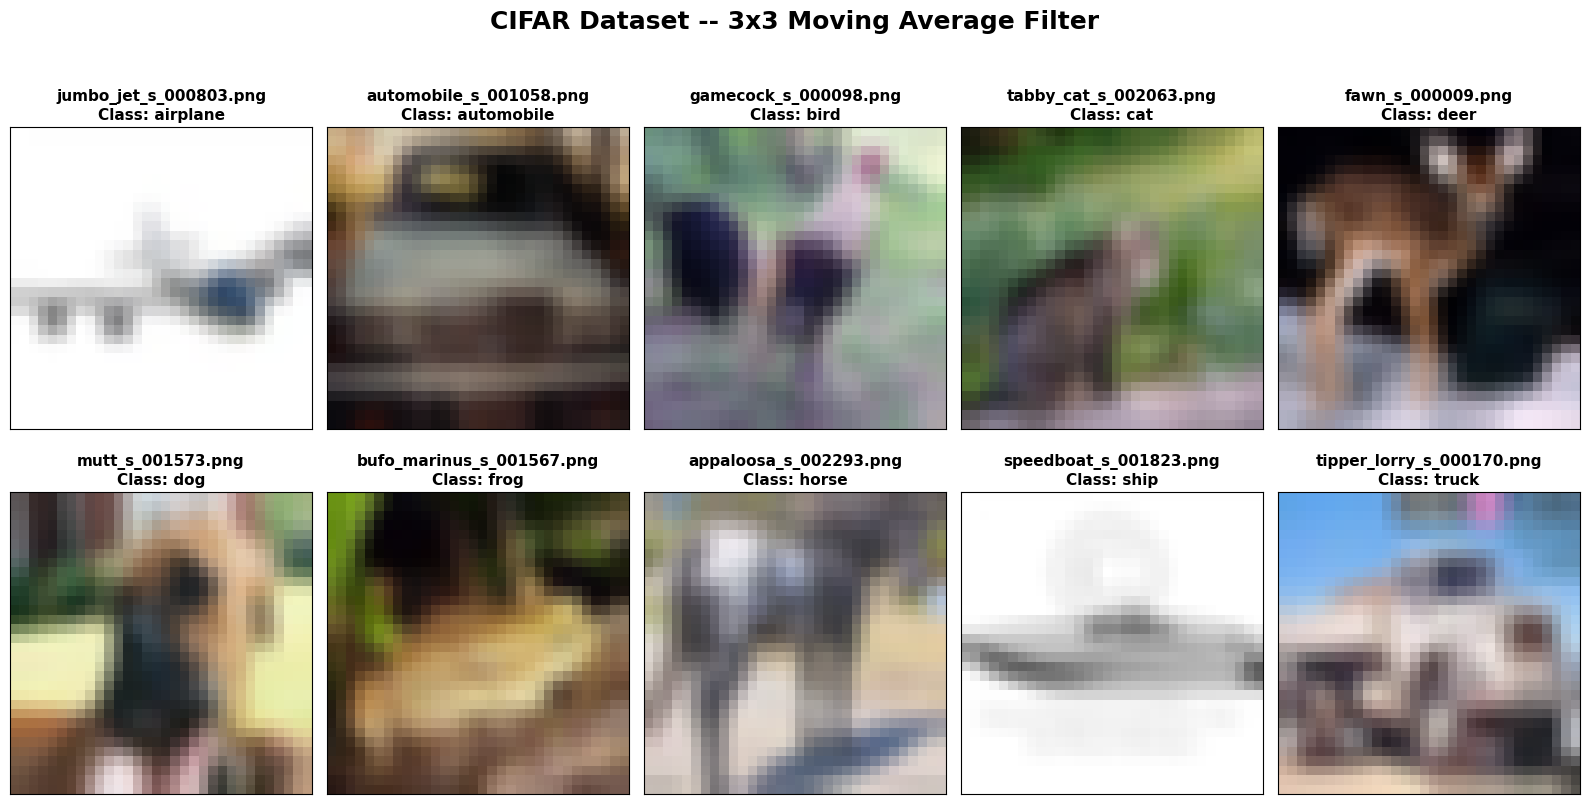

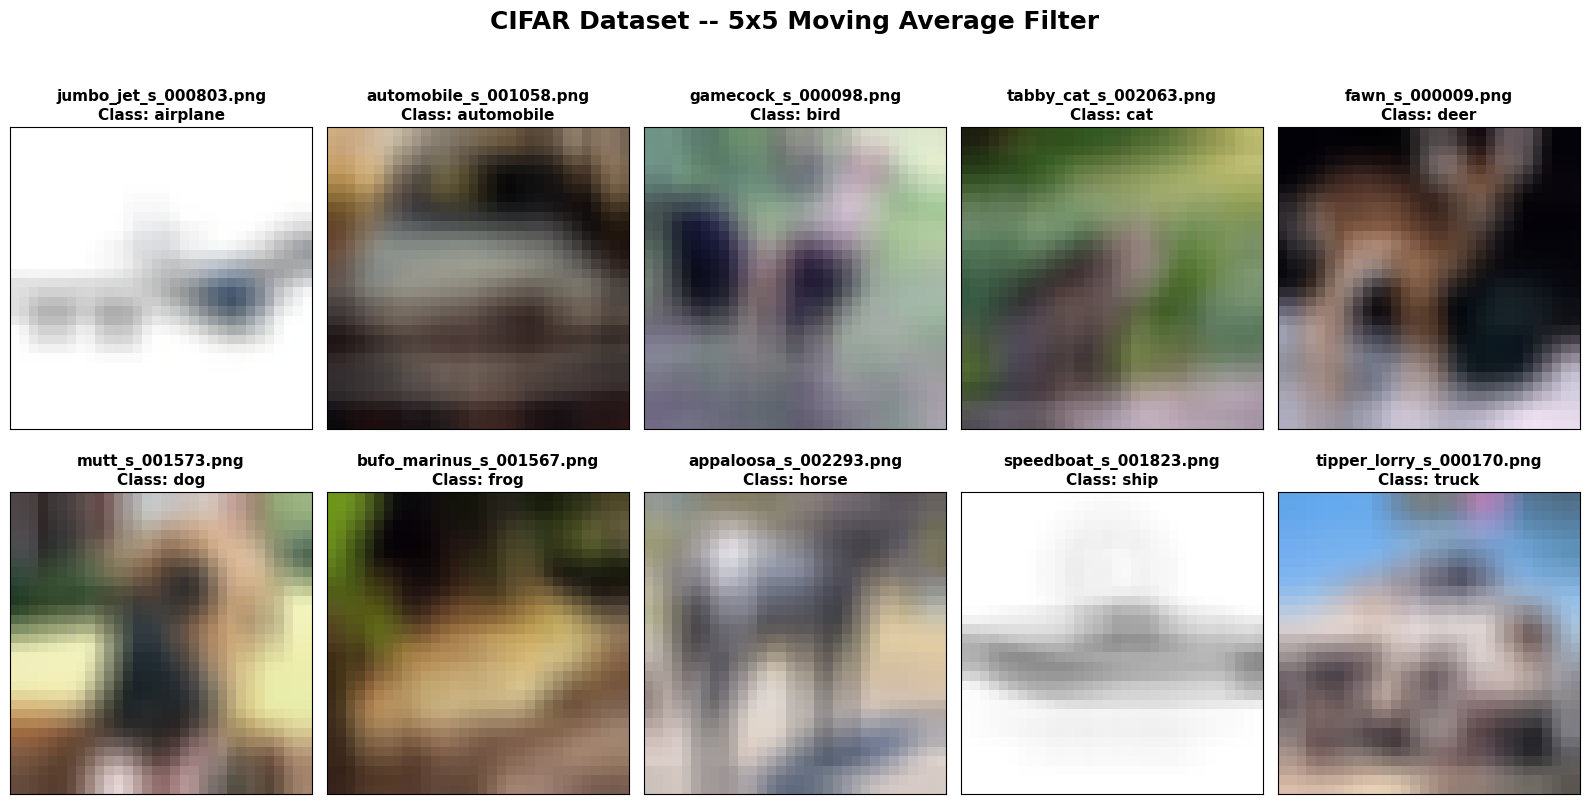

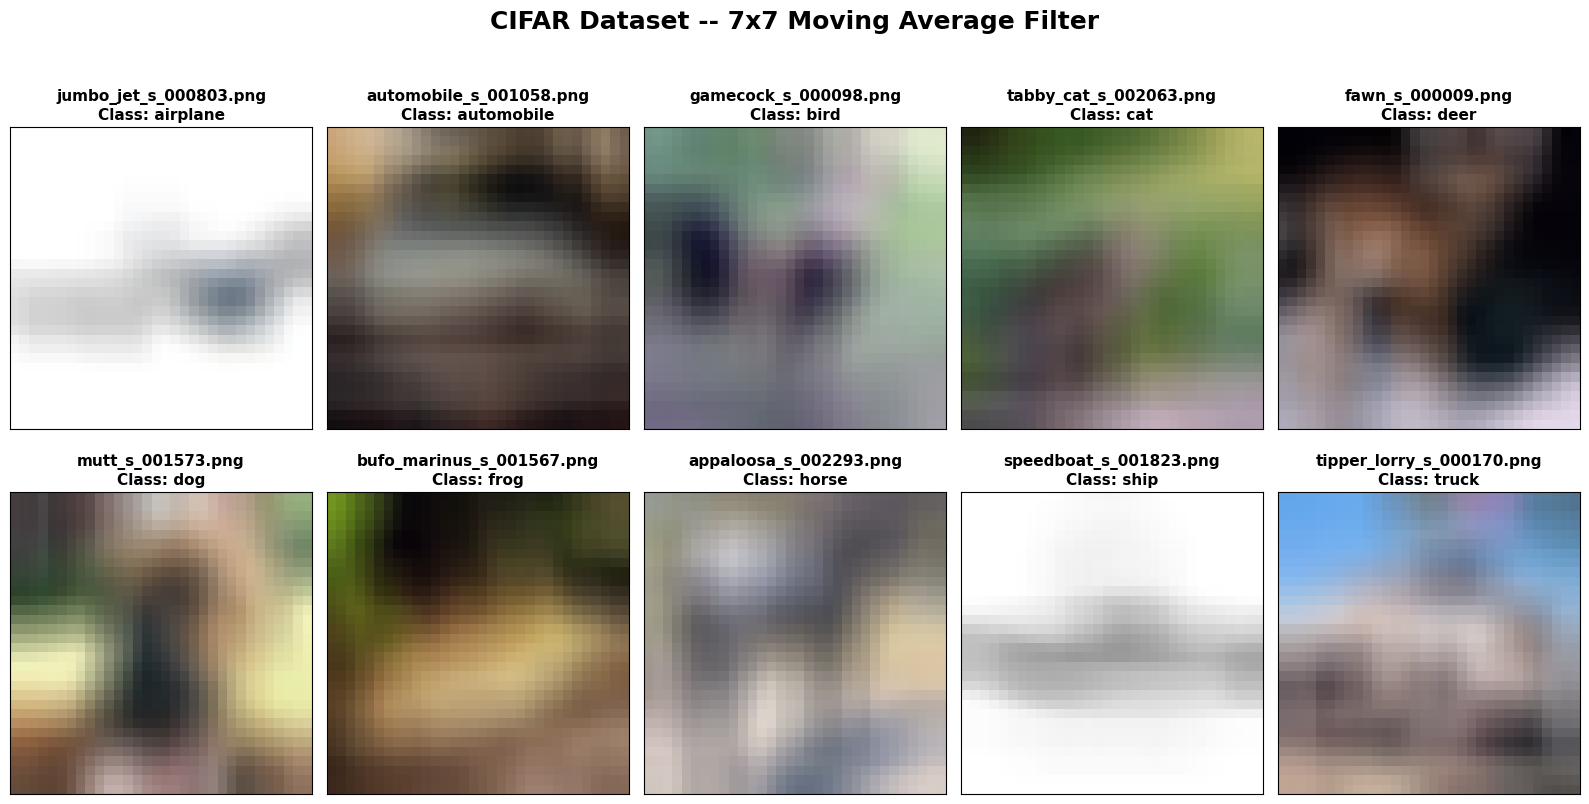

In [8]:
for filt_size in [(3,3), (5,5), (7,7)]:
    fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
    fig.suptitle(f"CIFAR Dataset -- {filt_size[0]}x{filt_size[1]} Moving Average Filter", fontsize = 18, fontweight = 'bold')
    ax = ax.flatten() # flatten array to iterate with a single loop

    K = 1/(filt_size[0]*filt_size[1]) * np.ones(filt_size)

    for ii in range(10):    
        # visualize image
        ax[ii].imshow(cv.filter2D(src = img_data[ii].rgb, ddepth = -1, kernel = K))
        ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
        
        # remove x/y-ticks from image
        ax[ii].set_xticks([])
        ax[ii].set_yticks([])
        ax[ii].set_xticklabels([])
        ax[ii].set_yticklabels([])
        
    fig.savefig(figure_path(f"moving_average_{filt_size[0]}x{filt_size[1]}.png"))

Apply median filtering to the image

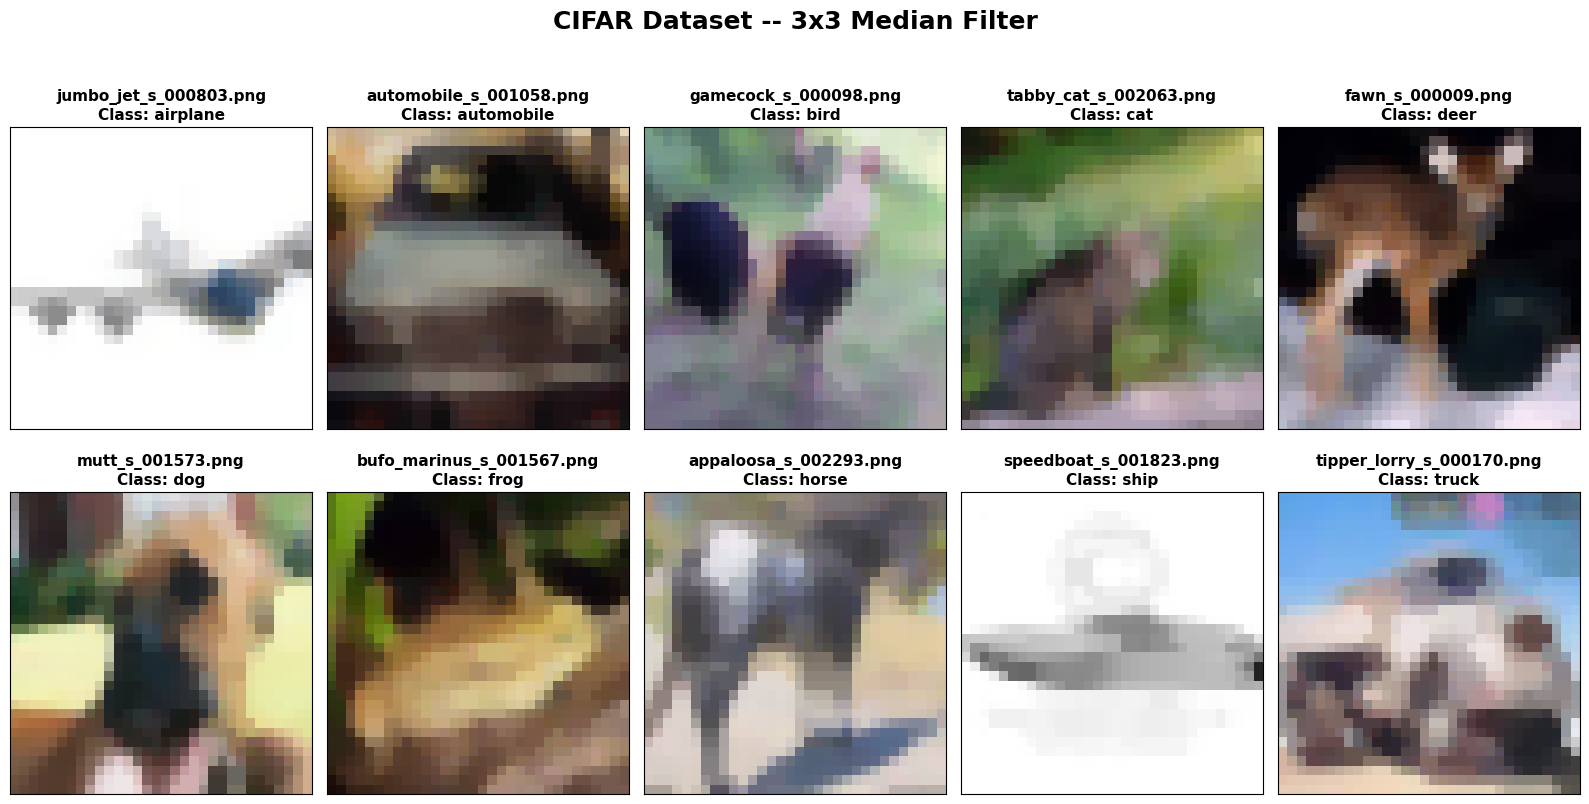

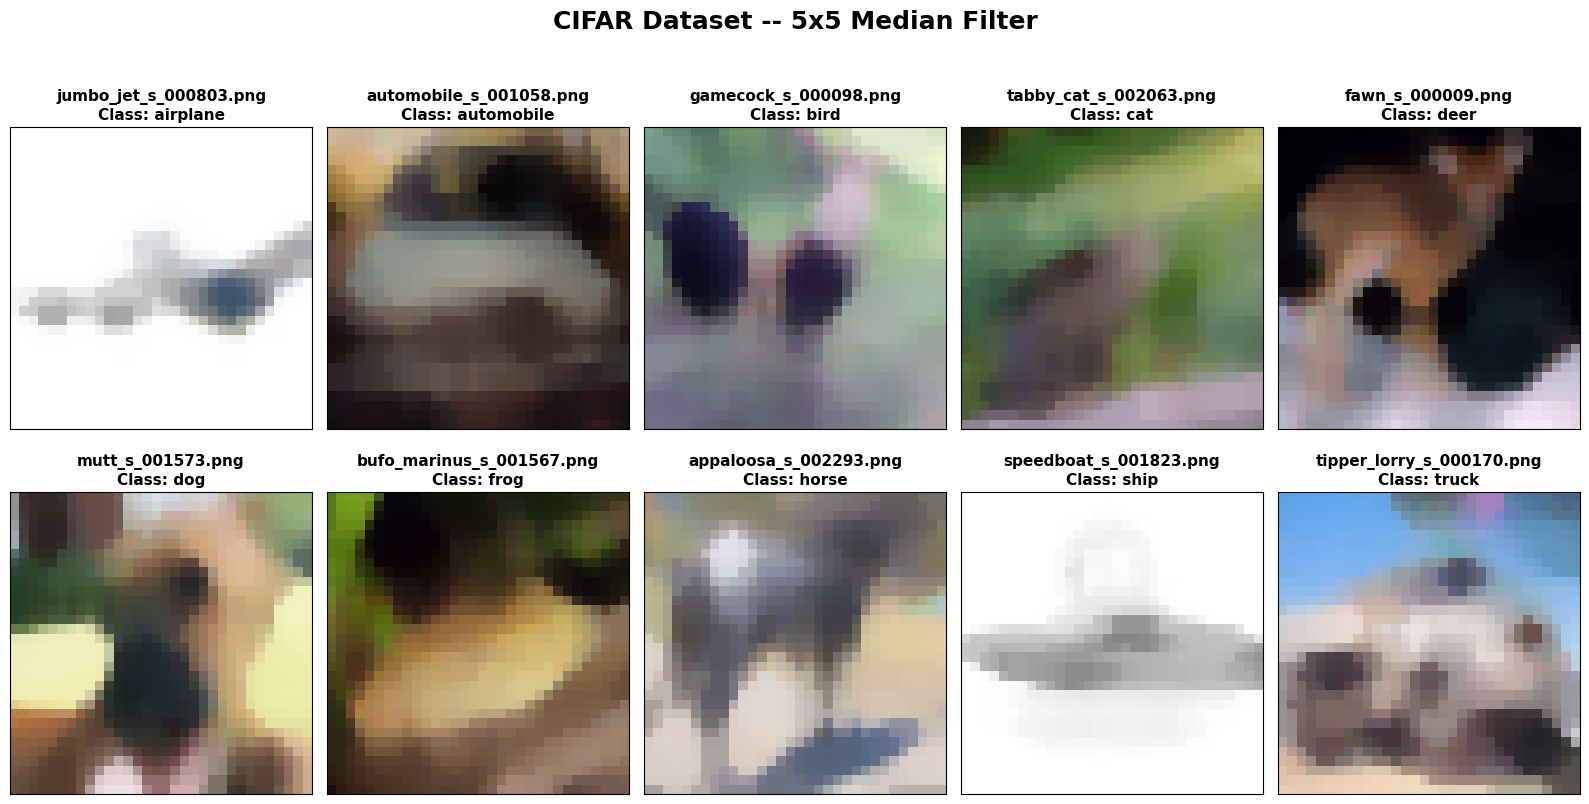

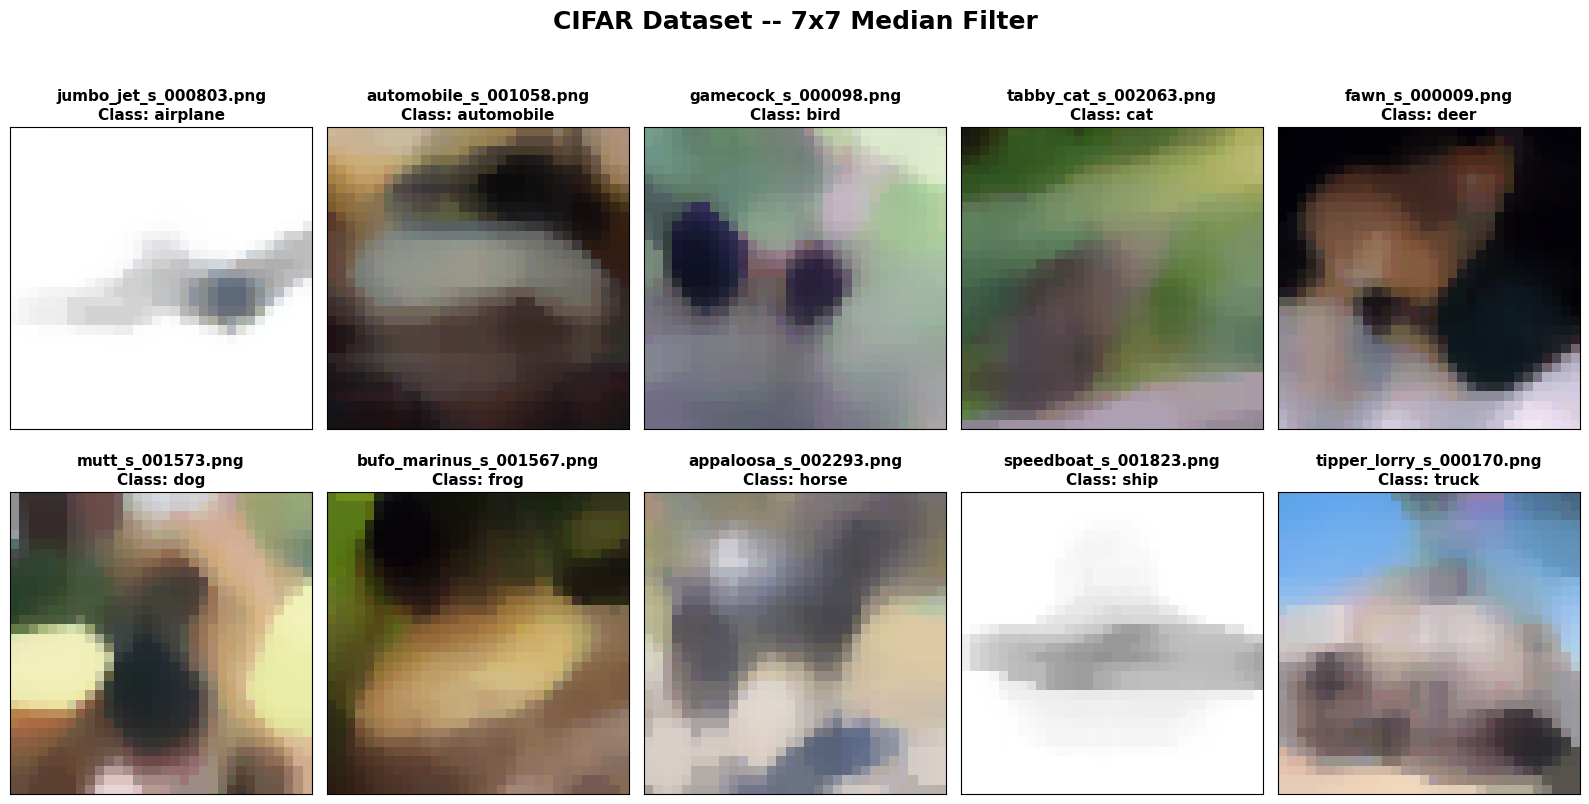

In [9]:
for filt_size in [3, 5, 7]:
    fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
    fig.suptitle(f"CIFAR Dataset -- {filt_size}x{filt_size} Median Filter", fontsize = 18, fontweight = 'bold')
    ax = ax.flatten() # flatten array to iterate with a single loop

    for ii in range(10):    
        # visualize image
        ax[ii].imshow(cv.medianBlur(src = img_data[ii].rgb, ksize = filt_size))
        ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
        
        # remove x/y-ticks from image
        ax[ii].set_xticks([])
        ax[ii].set_yticks([])
        ax[ii].set_xticklabels([])
        ax[ii].set_yticklabels([])
        
    fig.savefig(figure_path(f"median_filter_{filt_size}x{filt_size}.png"))

Canny Edge Detection

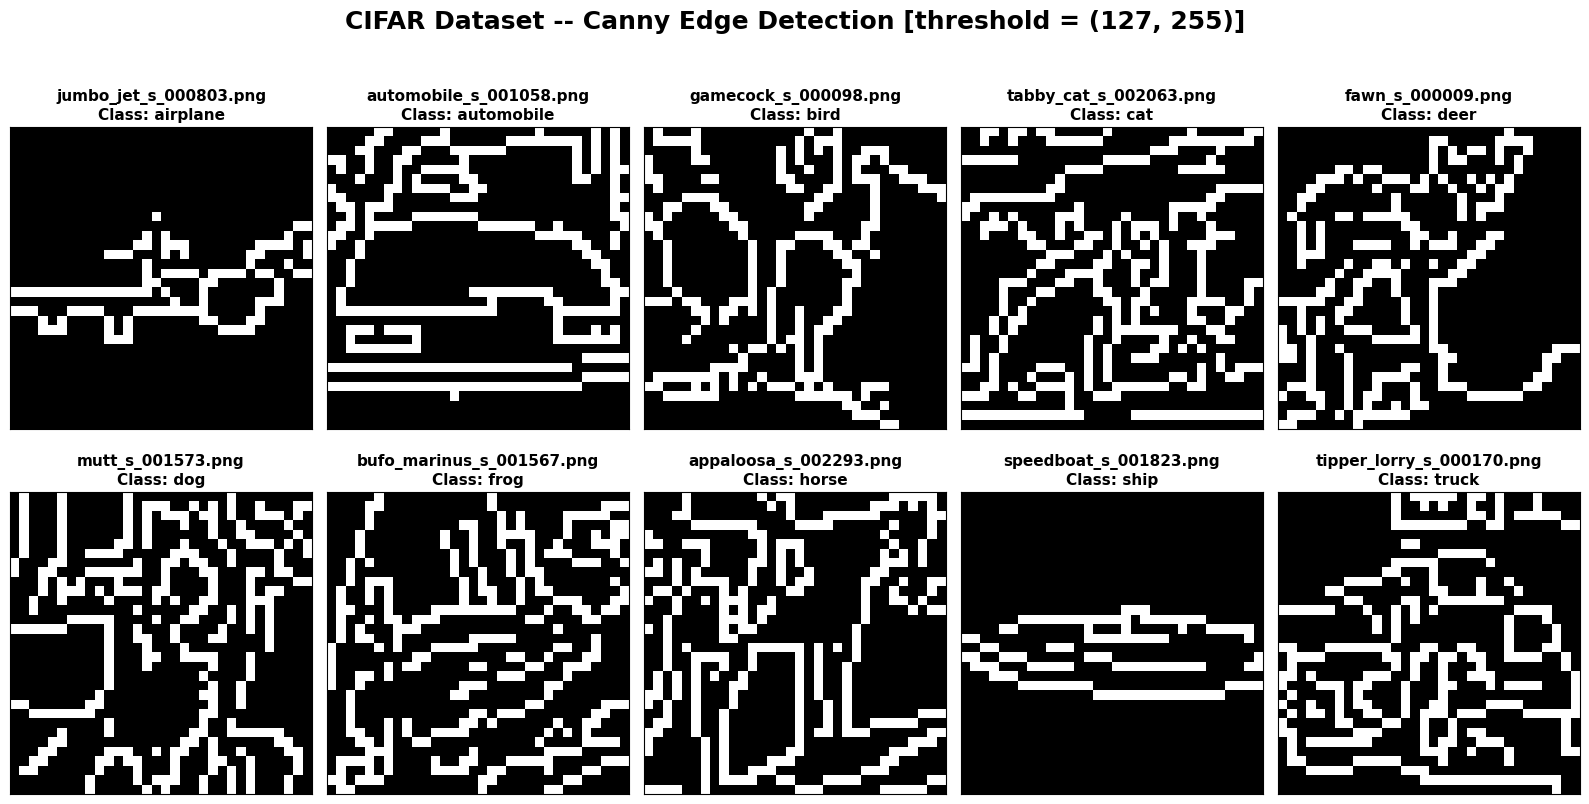

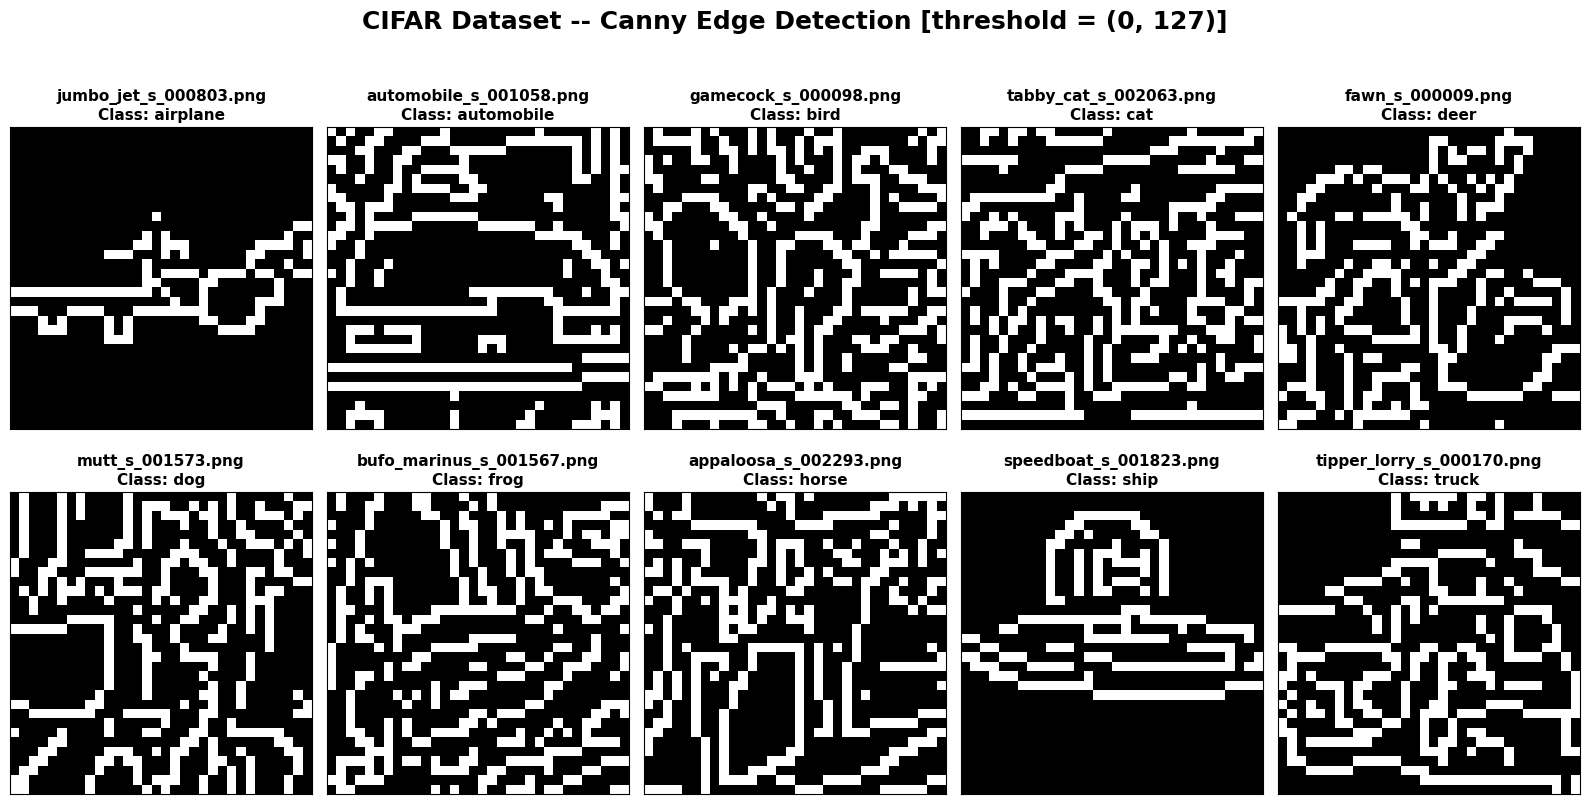

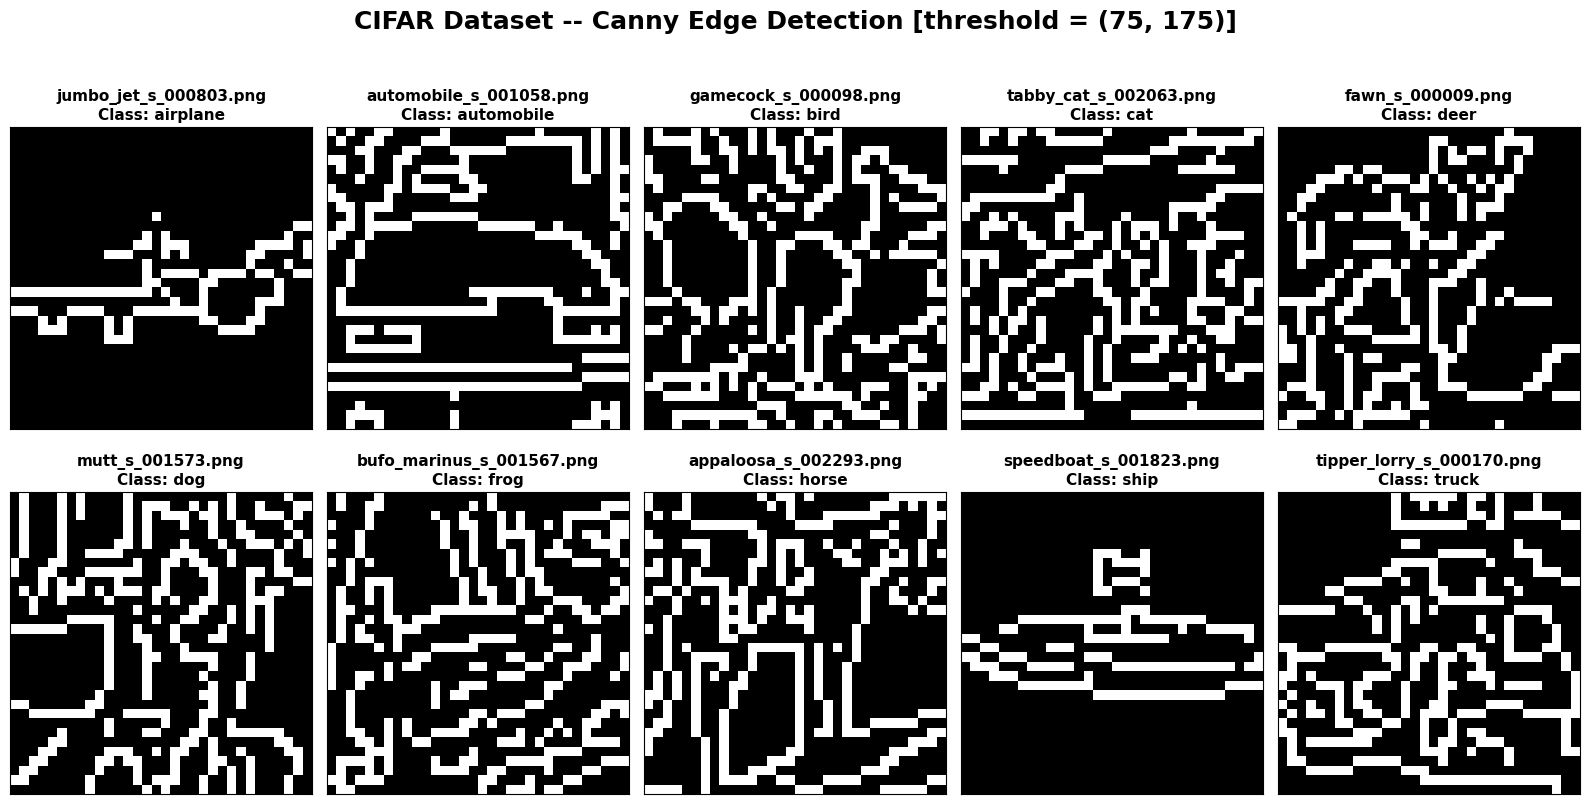

In [10]:
for threshold in [(255//2, 255), (0, 255//2), (75, 175)]:
    fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
    fig.suptitle(f"CIFAR Dataset -- Canny Edge Detection [threshold = {threshold}]", fontsize = 18, fontweight = 'bold')
    ax = ax.flatten() # flatten array to iterate with a single loop

    for ii in range(10):    
        # visualize image
        ax[ii].imshow(cv.Canny(img_data[ii].rgb, *threshold), cmap = 'gray')
        ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
        
        # remove x/y-ticks from image
        ax[ii].set_xticks([])
        ax[ii].set_yticks([])
        ax[ii].set_xticklabels([])
        ax[ii].set_yticklabels([])
        
    fig.savefig(figure_path(f"canny_edge_thresh_{threshold[0]}_{threshold[1]}.png"))

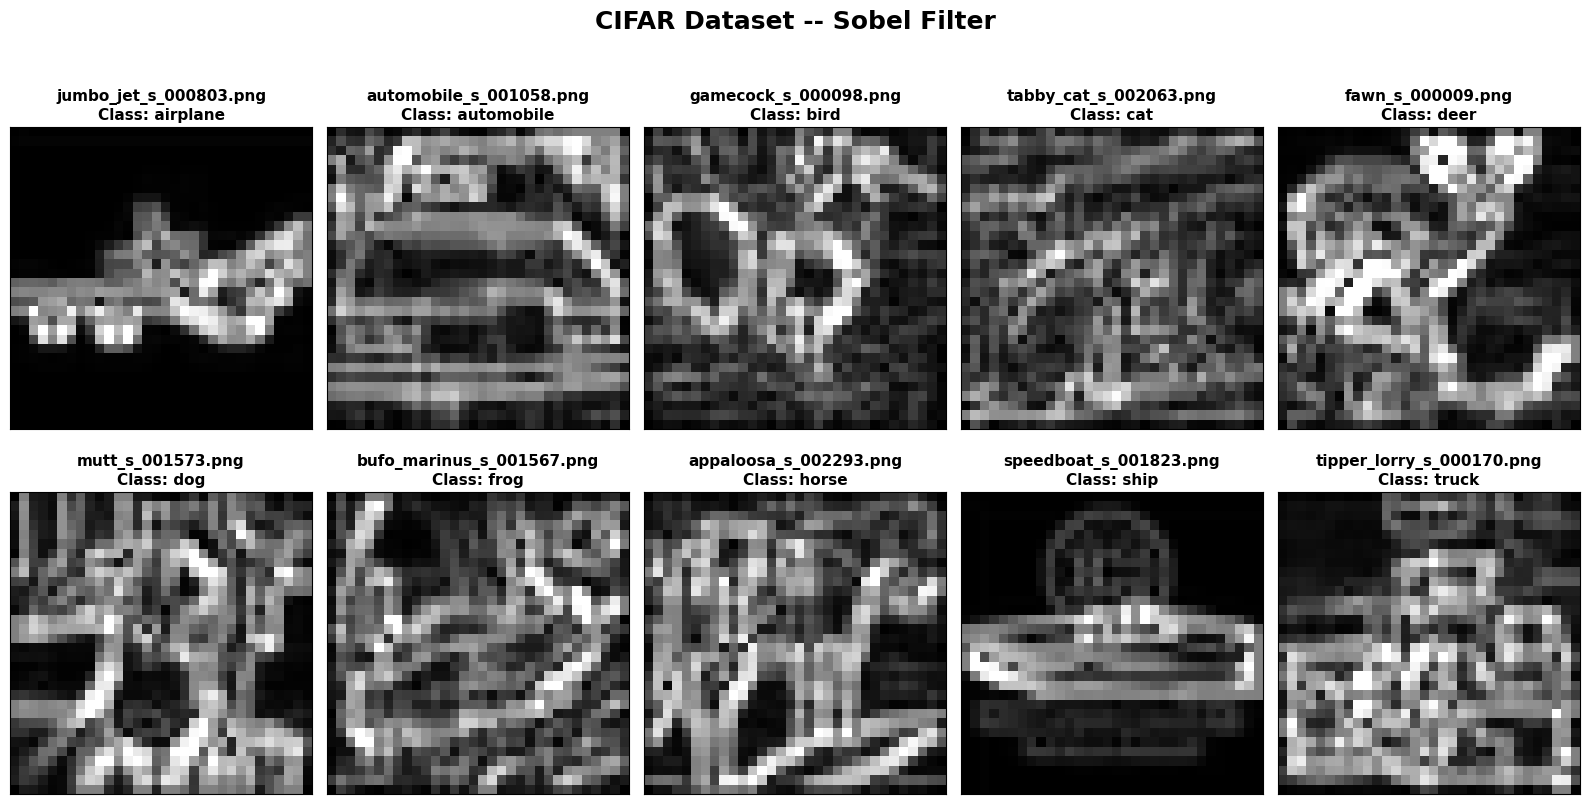

In [11]:
fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
fig.suptitle(f"CIFAR Dataset -- Sobel Filter", fontsize = 18, fontweight = 'bold')
ax = ax.flatten() # flatten array to iterate with a single loop

for ii in range(10):    
    gray = cv.cvtColor(img_data[ii].rgb, cv.COLOR_RGB2GRAY)
    
    grad_x = cv.Sobel(gray, cv.CV_16S, 1, 0, ksize=3)
    grad_y = cv.Sobel(gray, cv.CV_16S, 0, 1, ksize=3)

    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    # visualize image
    ax[ii].imshow(grad, cmap = 'gray')
    ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
    
    # remove x/y-ticks from image
    ax[ii].set_xticks([])
    ax[ii].set_yticks([])
    ax[ii].set_xticklabels([])
    ax[ii].set_yticklabels([])
    
fig.savefig(figure_path("sobel_filter.png"))

Harris Corners

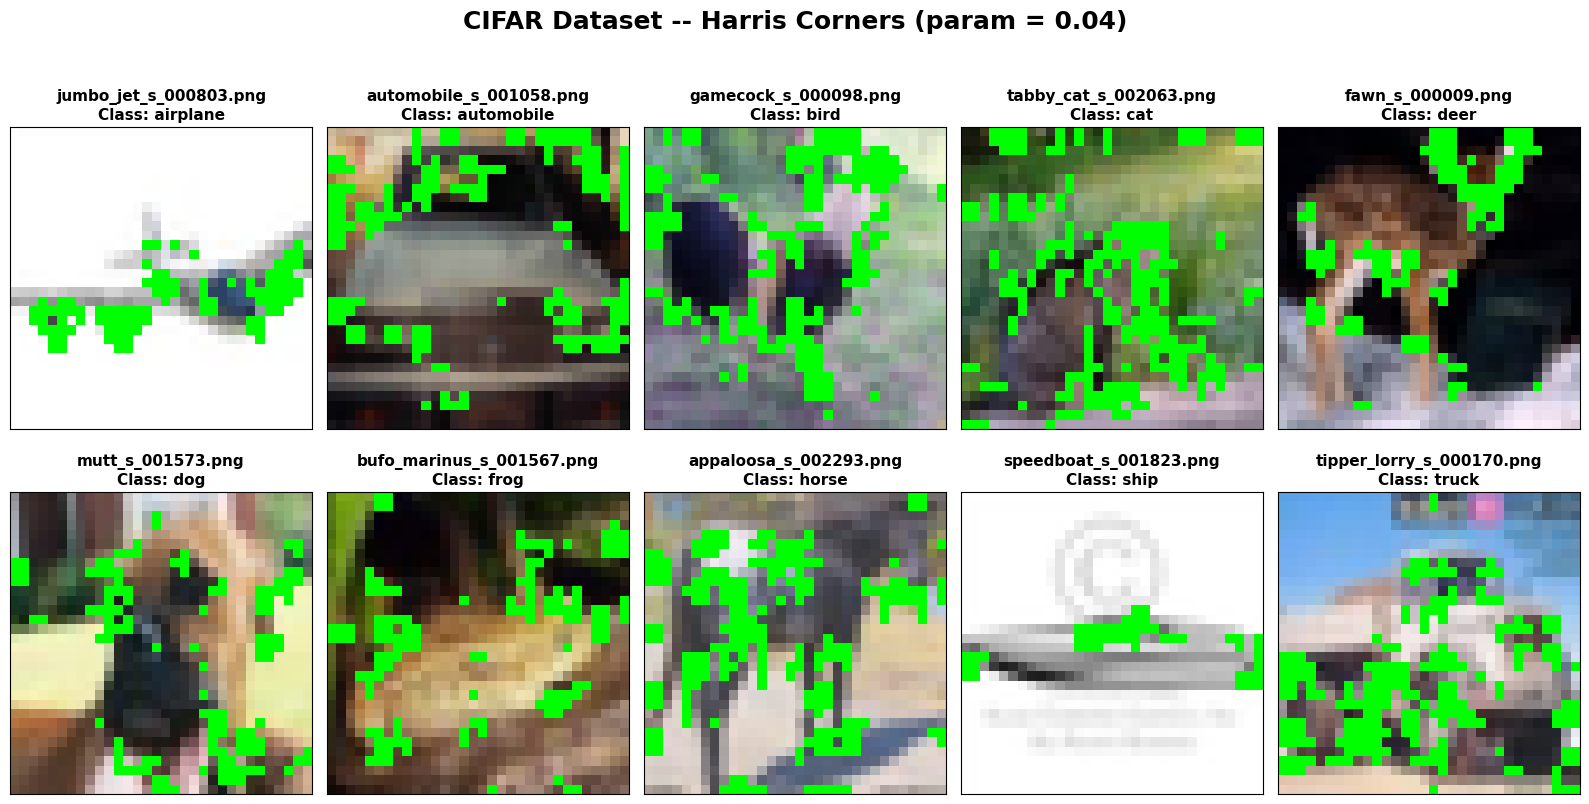

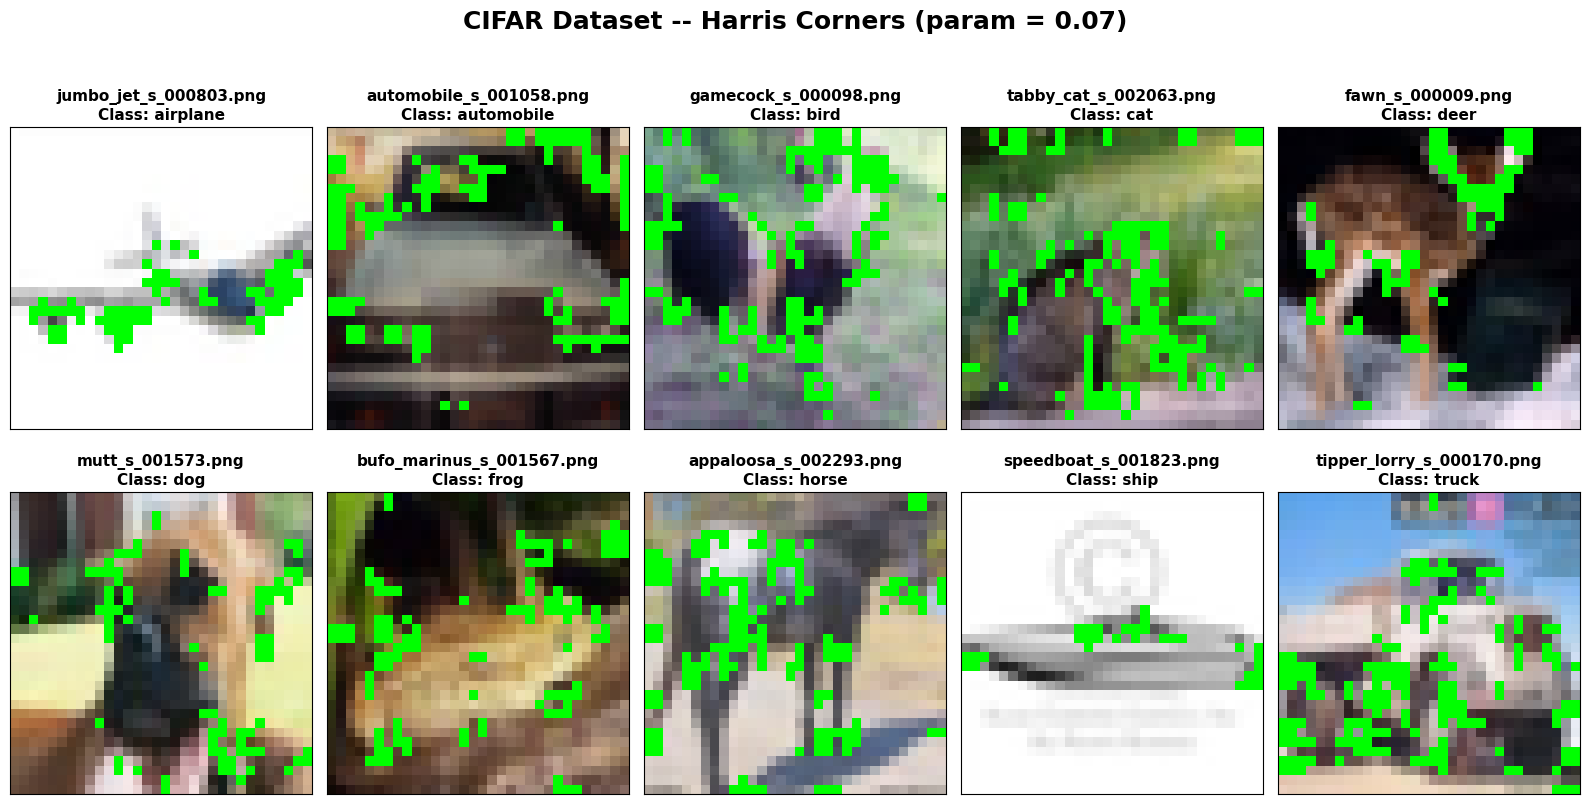

In [12]:
for param in [0.04, 0.07]:
    fig, ax = plt.subplots(2, 5, figsize = (16, 9), tight_layout = True)
    fig.suptitle(f"CIFAR Dataset -- Harris Corners (param = {param})", fontsize = 18, fontweight = 'bold')
    ax = ax.flatten() # flatten array to iterate with a single loop

    for ii in range(10):    
        img = copy.deepcopy(img_data[ii].rgb)
        gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
        harris = cv.cornerHarris(src = np.float32(gray), blockSize = 2, ksize = 3, k = param)
        
        for i in range(np.shape(harris)[0]):
            for j in range(np.shape(harris)[1]):
                if harris[i][j] > 0.01*harris.max(): 
                    img[i,j,:] = GREEN_U8
        
        # visualize image
        ax[ii].imshow(img)
        ax[ii].set_title(f"{img_data[ii].filename}\nClass: {img_data[ii].img_class}", fontsize = 11, fontweight = 'bold')
        
        # remove x/y-ticks from image
        ax[ii].set_xticks([])
        ax[ii].set_yticks([])
        ax[ii].set_xticklabels([])
        ax[ii].set_yticklabels([])
        
    fig.savefig(figure_path(f"harris_corner_param_{param}.png"))

Convolution and Correlation

In [13]:
# Define kernel size
KERNEL_SIZE = 3

# Define box filter
h = 1/9 * np.ones((KERNEL_SIZE, KERNEL_SIZE))

# Flip filter, used for convolution
h_flipped = np.flip(h, axis = (0, 1))

# Define image, using the second image in array of 10
rgb_img = img_data[2].rgb

# Convert image to gray-scale
gray_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2GRAY)

# Image size
W, H = np.shape(gray_img)

def get_pixel(img: np.ndarray, x: int, y: int):
    # return zero pixel if the pixel is outside of the image boundaries
    if x < 0 or y < 0 or x >= np.shape(img)[0] or y >= np.shape(img)[1]: 
        return 0
    
    # otherwise, return the pixel in the image array
    return img[x,y]

In [14]:
# ----- Cross-Correlation -----
def xcorr2d(img: np.ndarray, h: np.ndarray) -> np.ndarray:
    """Performs zero-padded, same-sized, 2D-correlation

    Args:
        img (np.ndarray): 2D input image array
        h (np.ndarray): 2D kernel filter

    Returns:
        np.ndarray: Cross-correlated image, same-size as input image
    """
    # Get width, height of input image and filter
    W_img, H_img    = np.shape(img)
    W_K, H_K        = np.shape(h)
    
    assert W_K == H_K,      f"Filter must be square (dim={W_K}x{H_K})"
    assert W_K % 2 != 0,    f"Filter dimensions must be odd (dim={W_K}x{H_K})"
    assert W_K > 1,         f"Filter must be > size 1 (dim={W_K}x{H_K})"
    
    # Define empty array - will be outputting same-sized convolution
    corr_img = np.zeros((W_img, H_img))
    
    # Perform correlation
    #####################
    # Loop through rows of image
    for i in range(W_img):
        # Loop through columns of image
        for j in range(H_img):
            # Loop through rows of kernel
            for m in range(W_K):
                # Loop through columns of kernel
                for n in range(H_K):
                    # Sum elements over the mxn kernel for the output image's i,j pixel
                    # Image is indexed at [i + m-int(W/2), j + n-int(H/2)] in order to center the 
                    # image about the kernel.
                    # 
                    # i.e. for kernel of dim 3x3, the correlation takes place across 
                    # [(i+0-int(3/2), i+2-int(3/2)), (j+0-int(3/2), j+2-int(3/2)]
                    # [(i-1,i+1), (j-1,j+1)]
                    corr_img[i,j] += h[m,n] * get_pixel(img, i+(m-(W_K//2)), j+(n-(H_K//2)))
                    
    return corr_img  

corr_img = xcorr2d(gray_img, h)

In [15]:
def conv2d(img: np.ndarray, h: np.ndarray) -> np.ndarray:
    """Performs zero-padded, same-sized, 2D-convolution

    Args:
        img (np.ndarray): 2D input image array
        h (np.ndarray): 2D kernel filter

    Returns:
        np.ndarray: Convolved image, same-size as input image
    """
    # Flip filter
    h_flipped = np.flip(h, axis = (0,1))

    # Perform 2D cross-correlation with flipped filter to get the convolution
    return xcorr2d(img, h_flipped)

conv_img = conv2d(gray_img, h)

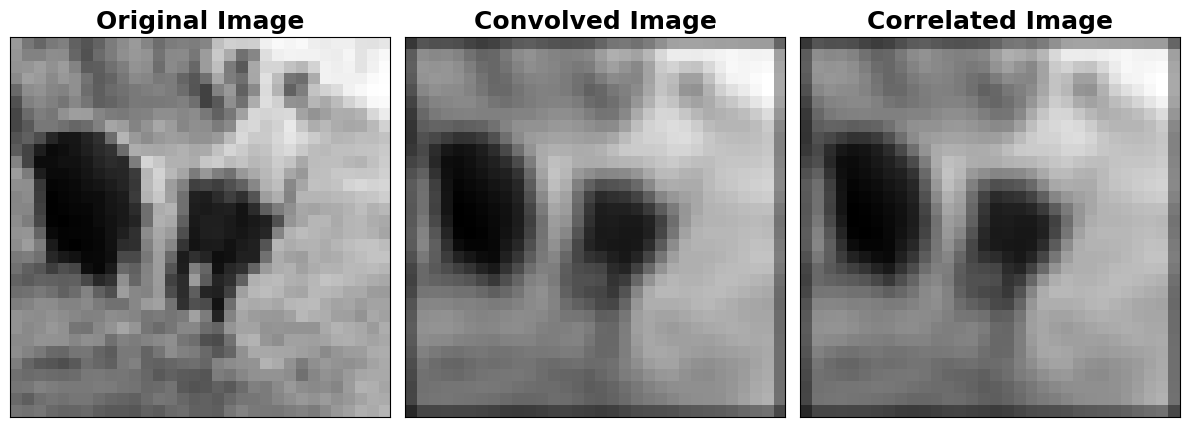

In [18]:
# Plot convolution + correlation
fig, ax = plt.subplots(1, 3, figsize = (12, 7), tight_layout = True)

ax[0].imshow(gray_img, cmap = "gray")
ax[0].set_title("Original Image", fontsize = 18, fontweight = 'bold')

ax[1].imshow(conv_img, cmap = "gray")
ax[1].set_title("Convolved Image", fontsize = 18, fontweight = 'bold')

ax[2].imshow(corr_img, cmap = "gray")
ax[2].set_title("Correlated Image", fontsize = 18, fontweight = 'bold')

for a in ax:
    # remove x/y-ticks from image
    a.set_xticks([])
    a.set_yticks([])
    a.set_xticklabels([])
    a.set_yticklabels([])
    
fig.savefig(figure_path("conv_corr.png"))